## Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Linear Regression

### The Normal Equation

In [2]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Saving figure generated_data_plot


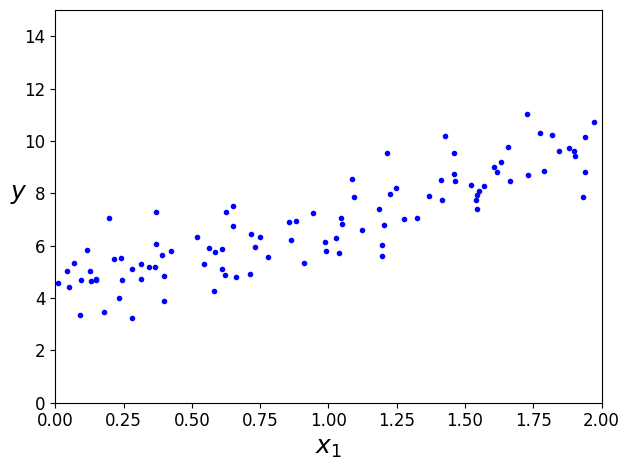

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

In [6]:
'''
In summary, the purpose of these two lines of code is to add a bias term to the input matrix 
and compute the optimal values of the model parameters (theta) for linear regression. This 
allows the model to make accurate predictions on new instances of data.
'''

# adds a column of 1's (representing the bias term) to the input matrix X
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
# minimize the mean squared error between the predicted output (y_hat) and 
    # the actual output (y) on the training data. 
# uses the normal equation to compute the optimal value of theta
# optimal parameters theta_best
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [7]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [8]:
'''
 This creates a new 2x1 numpy array X_new with two instances and one feature each. 
 The instances are [0] and [2].
'''
X_new = np.array([[0], [2]])
# allows us to make predictions using the linear regression model with a bias term.
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

In [10]:
X_new_b

array([[1., 0.],
       [1., 2.]])

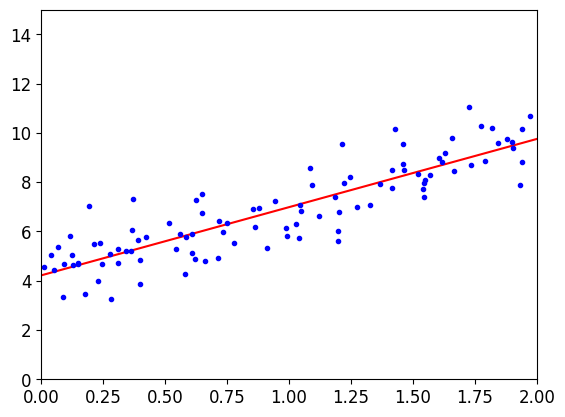

In [9]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

### Linear Regression Model

In [30]:
# X

In [11]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [27]:
X_new

array([[0],
       [2]])

In [18]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

### Linear Regression Model - scipy.linalg.lstsq()

In [29]:
# X_b

In [28]:
# y

In [13]:
'''
- rcond is the cutoff ratio for small singular values. Singular values smaller than rcond 
    times the largest singular value are set to zero. This parameter is used to determine 
    the effective rank of X_b.
'''
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

### Linear Regression Model - scipy.linalg.pinv()

In [15]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

# Gradient Descent

## Batch Gradient Descent

In [46]:
# X_b

In [39]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [43]:
theta

array([[4.21509616],
       [2.77011339]])

In [44]:
X_new_b.dot(theta)

array([[4.21509616],
       [9.75532293]])

In [47]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            #  red dashed line at the first iteration
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        '''
        updates the parameter vector theta using the gradient of the mean squared error loss 
            function with respect to theta.
        '''
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

Saving figure gradient_descent_plot


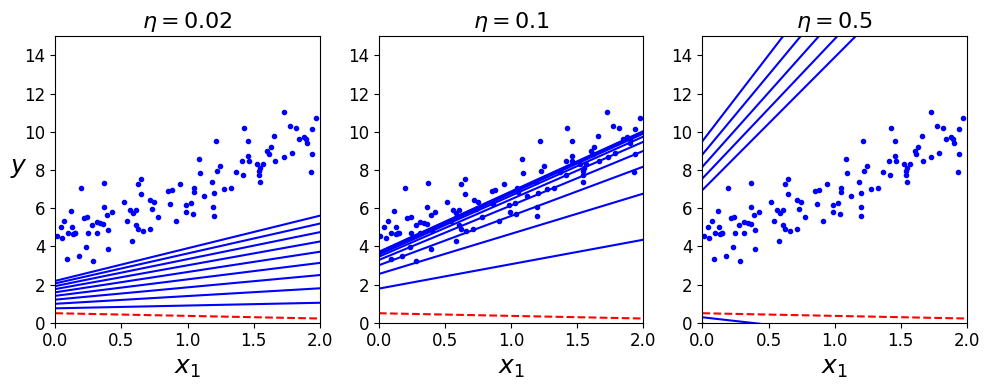

In [48]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()

## Stochastic Gradient Descent

In [50]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

In [52]:
X_new

array([[0],
       [2]])

Saving figure sgd_plot


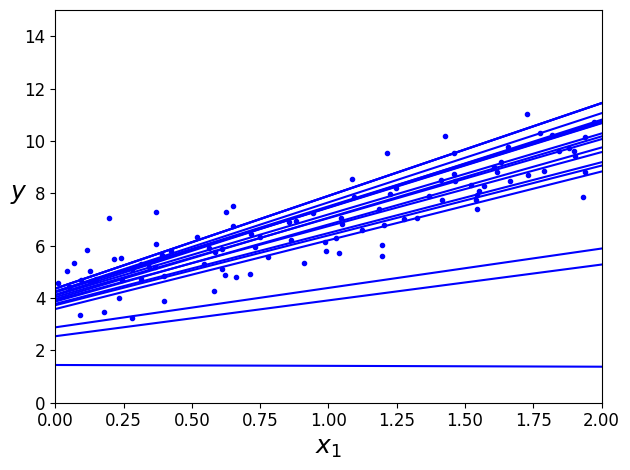

In [58]:
# determines the number of times the algorithm will iterate through the entire training set.
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

# randomly initialized using
theta = np.random.randn(2,1)  # random initialization

# plots the first 20 predictions on the initial model parameters for the first epoch.
for epoch in range(n_epochs):
    for i in range(m):
    # The learning rate is determined by the learning schedule and the current iteration number.
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)        
        '''
        - For each epoch, the algorithm randomly selects a sample from the training set and
        computes the gradients of the cost function with respect to the model parameters 
        using that sample.
        '''
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        
    # the learning schedule is defined using this parameter
        eta = learning_schedule(epoch * m + i) 
        theta = theta - eta * gradients
    # keep track of the path taken by the algorithm.    
        theta_path_sgd.append(theta)                 

plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                              
save_fig("sgd_plot")                                 
plt.show()                                           

In [60]:
# updated 1000 times
theta

array([[4.20773485],
       [2.73404191]])

In [61]:
from sklearn.linear_model import SGDRegressor

'''
- tol: tolerance for stopping criterion
- penalty: type of regularization to be used. In this case, no regularization is applied.
- eta0: initial learning rate for the 'constant' learning rate schedule
'''
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())


SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [62]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.24365286]), array([2.8250878]))

## Mini-batch gradient descent


- The main difference between 'Stochastic Gradient Descent' & 'Mini-batch gradient Descent'
is that for 'Mini-batch gradient Descent', instead of computing the gradients on the 
whole training set, it only uses a small random subset of the data at each iteration. 
In contrast, for 'Stochastic Gradient Descent', randomly selects a single data point at 
each iteration to compute the gradient. Both mini-batch and stochastic gradient descent
are faster than 'regular gradient descent', but 'mini-batch' is usually more stable and
can converge to a better solution, while stochastic gradient descent has more 
randomness and can jump around the solution space more. Also, the first code snippet 
keeps track of the path taken by the algorithm at each iteration, while the second one 
only keeps track of the final solution.


In [66]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [67]:
theta

array([[4.25214635],
       [2.7896408 ]])

In [68]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

Saving figure gradient_descent_paths_plot


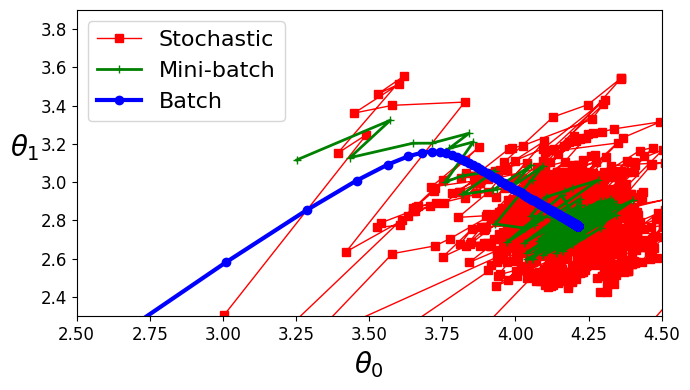

In [69]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
save_fig("gradient_descent_paths_plot")
plt.show()

1. Stochastic Gradient Descent (SGD) is generally the fastest of the three because it updates the parameters after processing each training example. SGD works well for large datasets and when using deep neural networks where training can take several epochs, as the weights are updated more frequently.

2. Mini-batch Gradient Descent (MBGD) is a compromise between SGD and Batch Gradient Descent. It works by randomly selecting a small batch of training examples and updating the model parameters based on the mean gradient of that batch. MBGD is suitable for medium-sized datasets, as it reduces the variance of the gradient updates while still being computationally efficient.

3. Batch Gradient Descent (BGD) computes the gradient of the cost function with respect to the model parameters for the entire training set, and updates the model parameters accordingly. BGD is the most precise of the three, but it is also the slowest and requires a lot of memory, making it impractical for large datasets.

- In summary, SGD is generally the fastest, followed by MBGD and then BGD, but the best algorithm to use depends on the specific problem and the resources available.

## Polynomial Regression

In [70]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [71]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

Saving figure quadratic_data_plot


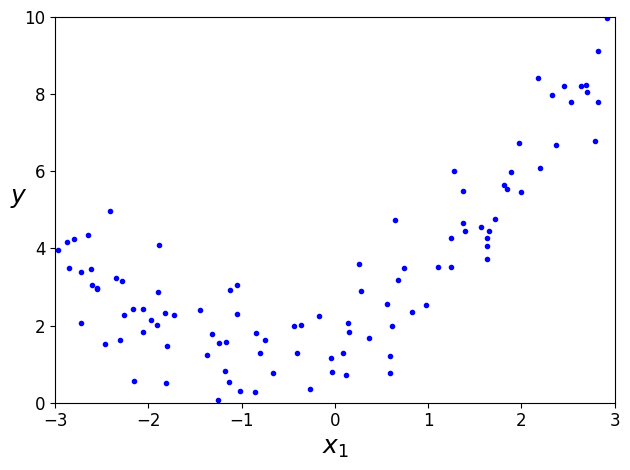

In [73]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_data_plot")
plt.show()

In [76]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [77]:
X[0]

array([-0.75275929])

In [75]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [78]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

In [84]:
'''
- creates a new NumPy array called X_new that contains 100 evenly spaced values between
    -3 and 3. The linspace function from NumPy is used to generate these values, which 
    are then reshaped into a 2-dimensional array with 100 rows and 1 column. This 
    reshaping is necessary because scikit-learn's predict method expects a 2D array as 
    input, where each row represents a sample and each column represents a feature.
'''
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
''' 
- typically done so that the model can use the new polynomial features to make 
    predictions on the new input data.
'''
X_new_poly = poly_features.transform(X_new)
X_new_poly
# y_new = lin_reg.predict(X_new_poly)
# plt.plot(X, y, "b.")
# plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
# plt.xlabel("$x_1$", fontsize=18)
# plt.ylabel("$y$", rotation=0, fontsize=18)
# plt.legend(loc="upper left", fontsize=14)
# plt.axis([-3, 3, 0, 10])
# save_fig("quadratic_predictions_plot")
# plt.show()

array([[-3.00000000e+00,  9.00000000e+00],
       [-2.93939394e+00,  8.64003673e+00],
       [-2.87878788e+00,  8.28741965e+00],
       [-2.81818182e+00,  7.94214876e+00],
       [-2.75757576e+00,  7.60422406e+00],
       [-2.69696970e+00,  7.27364555e+00],
       [-2.63636364e+00,  6.95041322e+00],
       [-2.57575758e+00,  6.63452709e+00],
       [-2.51515152e+00,  6.32598714e+00],
       [-2.45454545e+00,  6.02479339e+00],
       [-2.39393939e+00,  5.73094582e+00],
       [-2.33333333e+00,  5.44444444e+00],
       [-2.27272727e+00,  5.16528926e+00],
       [-2.21212121e+00,  4.89348026e+00],
       [-2.15151515e+00,  4.62901745e+00],
       [-2.09090909e+00,  4.37190083e+00],
       [-2.03030303e+00,  4.12213039e+00],
       [-1.96969697e+00,  3.87970615e+00],
       [-1.90909091e+00,  3.64462810e+00],
       [-1.84848485e+00,  3.41689624e+00],
       [-1.78787879e+00,  3.19651056e+00],
       [-1.72727273e+00,  2.98347107e+00],
       [-1.66666667e+00,  2.77777778e+00],
       [-1.